# 几何变换

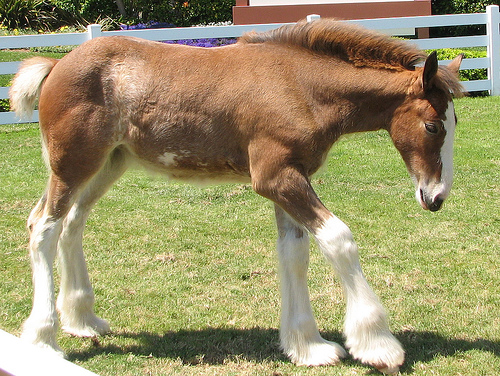

In [1]:
'''
Created on Nov 11, 2018

author: cuijialiang
'''
from PIL import Image
import numpy as np
im_PIL = Image.open("../img/horse.jpeg")
im_np = np.array(im_PIL)
im_PIL

#### 定义采样与变换方法

In [2]:
def nearst_sample(from_img_np, from_pos):
    center_h, center_w = from_pos
    center_h, center_w = int(round(center_h)), int(round(center_w))
    if center_h < 0 or center_h >= from_img_np.shape[0] or center_w < 0 or center_w >= from_img_np.shape[1]:
        return np.zeros(shape=(3, ), dtype=np.uint8)
    return from_img_np[center_h][center_w]


def geo_trans(ori_img_np, trans_mat, sample_func=nearst_sample):
    trans_mat = np.array(trans_mat, dtype=float)
    assert (3, 3) == trans_mat.shape
    assert len(ori_img_np.shape) == 3
    newheight, newwidth, newbands = ori_img_np.shape
    new_img_np = np.zeros(shape=ori_img_np.shape, dtype=np.uint8)
    for ih in range(newheight):
        for iw in range(newwidth):
            new_homog = np.array([ih, iw, 1.])
            ori_homog = np.dot(trans_mat, new_homog)
            ori_pos = (ori_homog[0]/ori_homog[2], ori_homog[1]/ori_homog[2])
            sample_res = sample_func(ori_img_np, ori_pos)
            new_img_np[ih][iw][:] = sample_func(ori_img_np, ori_pos)
    return new_img_np

#### 平移变换

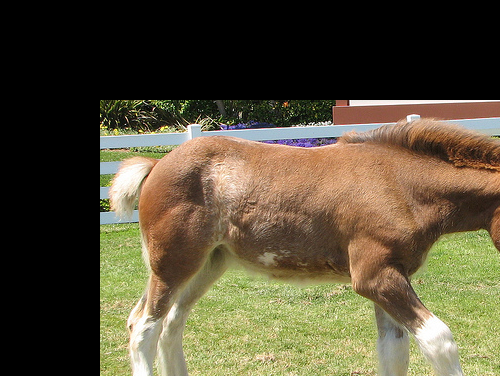

In [3]:
trans_img_np = geo_trans(im_np,
                        [
                            [1, 0, -100],
                            [0, 1, -100],
                            [0, 0, 1]
                        ])
Image.fromarray(trans_img_np)

#### 缩放

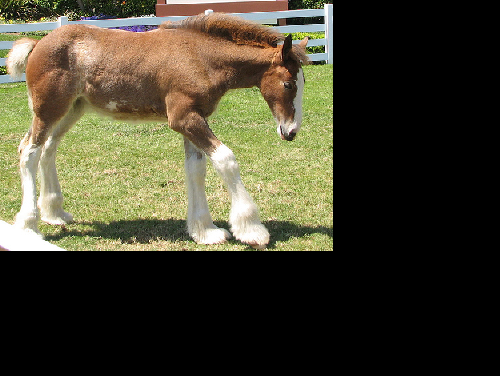

In [4]:
trans_img_np = geo_trans(im_np,
                        [
                            [1.5, 0, 0],
                            [0, 1.5, 0],
                            [0, 0, 1]
                        ])
Image.fromarray(trans_img_np)

#### 旋转

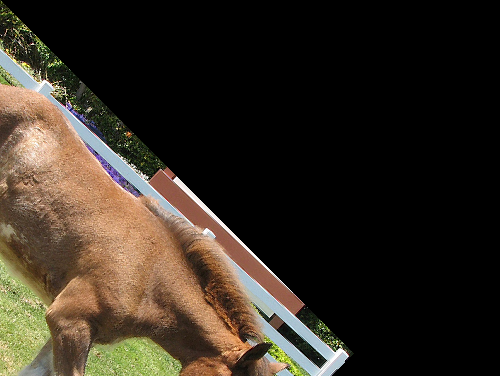

In [5]:
import math
trans_img_np = geo_trans(im_np,
                        [
                            [math.cos(math.pi/4), -math.sin(math.pi/4), 0],
                            [math.sin(math.pi/4), math.cos(math.pi/4), 0],
                            [0, 0, 1]
                        ])
Image.fromarray(trans_img_np)